# TD Machine Learning et réseaux de neurones

Ce TD est au format Jupyter Notebook. Il est assez pratique pour visualiser, tracer, exécuter du code et même écrire des équations (markdown $\approx$ LateX)

Pour exécuter une cellule, taper
'Maj.+Entrée'

La prochaine cellule permet de charger des paquets qui vous seront utiles

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import numpy as np


2024-10-18 15:53:03.408225: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 15:53:03.410532: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 15:53:03.418175: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 15:53:03.430338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 15:53:03.434134: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 15:53:03.443429: I tensorflow/core/platform/cpu_feature_gu

La cellule suivante télécharge le jeu de données 'MNIST': il s'agit d'un jeu de données de 36000 photographies de chiffres manuscrits

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


En exécutant la cellule qui suit, vous aurez une idée du type de données que vous allez traiter

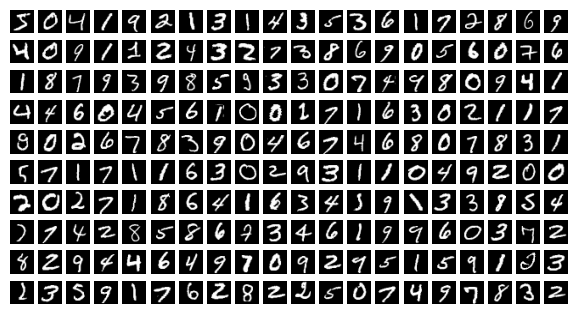

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7.195, 3.841), dpi=100)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(x_train[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.show()

Avant de construire un modèle de machine learning permettant de reconnaitre ces chiffres, il faut un peu travailler sur les données

In [6]:
# Renormalisation des données d'entrée (tout entre 0 et 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Conversion des labels sous forme de chaine de caractère en labels entiers entre 0 et 1 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Construction d'un modèle de type réseaux de neurones

In [7]:
# Construction d'un modèle de type réseau de neurones
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Applati les images 28x28 en un vecteur de dimension 784
    Dense(128, activation='gelu'),  # Première couche (dense) avec 128 neurones et fonction d'activation ReLU
    Dense(64, activation='gelu'),   # Seconde couche (dense) avec 64 neurones et fonction d'activation ReLU
    Dense(10, activation='softmax') # Couche de sortie: 10 neurones (un pour chaque classe) et activation 'softmax' (pour émuler une probabilité d'appartenir à une classe)
])


/net/npers/gpoette/ML/lib64/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1729259635.527873   32222 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-18 15:53:55.528509: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...

Compilation du modèle et de certains paramètres de l'apprentissage des poids du réseau

In [8]:
model.compile(#optimizer='adam',
              optimizer=SGD(learning_rate=1.),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Lancement de l'apprentissage

In [9]:
#Entrainement du model (batch_size = 36000 => apprentissage déterministe, si < 3600, apprentissage stochastique)
history=model.fit(x_train, y_train,  epochs=500, batch_size=36000, validation_split=0.4)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1085 - loss: 2.3328 - val_accuracy: 0.4072 - val_loss: 2.0380
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.4001 - loss: 2.0397 - val_accuracy: 0.4822 - val_loss: 1.7312
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - accuracy: 0.4745 - loss: 1.7305 - val_accuracy: 0.3490 - val_loss: 1.9209
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.3541 - loss: 1.9382 - val_accuracy: 0.2200 - val_loss: 4.0297
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.2247 - loss: 4.0707 - val_accuracy: 0.1021 - val_loss: 9.5979
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.1002 - loss: 9.8193 - val_accuracy: 0.0986 - val_loss: 7.6397
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.0998 - loss: 7.6304 - val_accuracy: 0.1118 - val_loss: 9.0835
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.1104 - loss: 9.1662 - val_accuracy: 0.1030 - val_

Epoch 116/500
1/1 [==============================] - 0s 133ms/step - loss: 2.0321 - accuracy: 0.2232 - val_loss: 1.9844 - val_accuracy: 0.2155
Epoch 117/500
1/1 [==============================] - 0s 128ms/step - loss: 1.9912 - accuracy: 0.2154 - val_loss: 2.0344 - val_accuracy: 0.2307
Epoch 118/500
1/1 [==============================] - 0s 132ms/step - loss: 2.0339 - accuracy: 0.2334 - val_loss: 2.0709 - val_accuracy: 0.1843
Epoch 119/500
1/1 [==============================] - 0s 132ms/step - loss: 2.0761 - accuracy: 0.1849 - val_loss: 2.2196 - val_accuracy: 0.2066
Epoch 120/500
1/1 [==============================] - 0s 146ms/step - loss: 2.2163 - accuracy: 0.2087 - val_loss: 2.0030 - val_accuracy: 0.2218
Epoch 121/500
1/1 [==============================] - 0s 140ms/step - loss: 2.0039 - accuracy: 0.2222 - val_loss: 2.0218 - val_accuracy: 0.2715
Epoch 122/500
1/1 [==============================] - 0s 126ms/step - loss: 2.0234 - accuracy: 0.2736 - val_loss: 1.9673 - val_accuracy: 0.2116

1/1 [==============================] - 0s 152ms/step - loss: 2.0890 - accuracy: 0.1568 - val_loss: 1.9883 - val_accuracy: 0.2730
Epoch 174/500
1/1 [==============================] - 0s 155ms/step - loss: 1.9883 - accuracy: 0.2756 - val_loss: 2.3064 - val_accuracy: 0.1282
Epoch 175/500
1/1 [==============================] - 0s 165ms/step - loss: 2.3077 - accuracy: 0.1306 - val_loss: 1.9855 - val_accuracy: 0.2896
Epoch 176/500
1/1 [==============================] - 0s 168ms/step - loss: 1.9848 - accuracy: 0.2855 - val_loss: 1.9572 - val_accuracy: 0.3092
Epoch 177/500
1/1 [==============================] - 0s 163ms/step - loss: 1.9527 - accuracy: 0.3119 - val_loss: 1.9358 - val_accuracy: 0.2950
Epoch 178/500
1/1 [==============================] - 0s 151ms/step - loss: 1.9331 - accuracy: 0.2979 - val_loss: 1.9152 - val_accuracy: 0.3209
Epoch 179/500
1/1 [==============================] - 0s 158ms/step - loss: 1.9116 - accuracy: 0.3243 - val_loss: 1.8979 - val_accuracy: 0.3063
Epoch 180/500

1/1 [==============================] - 0s 161ms/step - loss: 2.1851 - accuracy: 0.1676 - val_loss: 2.3338 - val_accuracy: 0.1164
Epoch 231/500
1/1 [==============================] - 0s 158ms/step - loss: 2.3439 - accuracy: 0.1152 - val_loss: 2.2230 - val_accuracy: 0.1903
Epoch 232/500
1/1 [==============================] - 0s 155ms/step - loss: 2.2192 - accuracy: 0.1929 - val_loss: 2.1793 - val_accuracy: 0.1787
Epoch 233/500
1/1 [==============================] - 0s 166ms/step - loss: 2.1830 - accuracy: 0.1781 - val_loss: 2.1517 - val_accuracy: 0.1750
Epoch 234/500
1/1 [==============================] - 0s 156ms/step - loss: 2.1442 - accuracy: 0.1787 - val_loss: 2.1474 - val_accuracy: 0.1871
Epoch 235/500
1/1 [==============================] - 0s 169ms/step - loss: 2.1498 - accuracy: 0.1868 - val_loss: 2.1015 - val_accuracy: 0.2123
Epoch 236/500
1/1 [==============================] - 0s 164ms/step - loss: 2.0944 - accuracy: 0.2159 - val_loss: 2.1012 - val_accuracy: 0.1867
Epoch 237/500

1/1 [==============================] - 0s 159ms/step - loss: 2.3415 - accuracy: 0.1063 - val_loss: 2.2633 - val_accuracy: 0.1096
Epoch 288/500
1/1 [==============================] - 0s 144ms/step - loss: 2.2589 - accuracy: 0.1142 - val_loss: 2.3811 - val_accuracy: 0.1012
Epoch 289/500
1/1 [==============================] - 0s 150ms/step - loss: 2.3896 - accuracy: 0.1023 - val_loss: 2.3897 - val_accuracy: 0.1047
Epoch 290/500
1/1 [==============================] - 0s 155ms/step - loss: 2.3900 - accuracy: 0.1064 - val_loss: 2.2549 - val_accuracy: 0.1549
Epoch 291/500
1/1 [==============================] - 0s 169ms/step - loss: 2.2561 - accuracy: 0.1532 - val_loss: 2.2506 - val_accuracy: 0.1095
Epoch 292/500
1/1 [==============================] - 0s 153ms/step - loss: 2.2474 - accuracy: 0.1142 - val_loss: 2.2437 - val_accuracy: 0.1502
Epoch 293/500
1/1 [==============================] - 0s 162ms/step - loss: 2.2448 - accuracy: 0.1515 - val_loss: 2.2418 - val_accuracy: 0.1093
Epoch 294/500

1/1 [==============================] - 0s 147ms/step - loss: 2.2270 - accuracy: 0.1145 - val_loss: 2.2450 - val_accuracy: 0.1058
Epoch 345/500
1/1 [==============================] - 0s 147ms/step - loss: 2.2486 - accuracy: 0.1062 - val_loss: 2.2308 - val_accuracy: 0.1097
Epoch 346/500
1/1 [==============================] - 0s 152ms/step - loss: 2.2263 - accuracy: 0.1144 - val_loss: 2.2988 - val_accuracy: 0.1001
Epoch 347/500
1/1 [==============================] - 0s 150ms/step - loss: 2.3054 - accuracy: 0.1013 - val_loss: 2.4050 - val_accuracy: 0.0640
Epoch 348/500
1/1 [==============================] - 0s 158ms/step - loss: 2.4061 - accuracy: 0.0655 - val_loss: 2.2995 - val_accuracy: 0.0992
Epoch 349/500
1/1 [==============================] - 0s 146ms/step - loss: 2.3019 - accuracy: 0.1008 - val_loss: 2.2876 - val_accuracy: 0.1096
Epoch 350/500
1/1 [==============================] - 0s 154ms/step - loss: 2.2843 - accuracy: 0.1142 - val_loss: 2.2797 - val_accuracy: 0.1060
Epoch 351/500

1/1 [==============================] - 0s 147ms/step - loss: 2.2716 - accuracy: 0.1307 - val_loss: 2.2494 - val_accuracy: 0.1101
Epoch 402/500
1/1 [==============================] - 0s 154ms/step - loss: 2.2456 - accuracy: 0.1148 - val_loss: 2.2133 - val_accuracy: 0.1880
Epoch 403/500
1/1 [==============================] - 0s 148ms/step - loss: 2.2135 - accuracy: 0.1867 - val_loss: 2.3805 - val_accuracy: 0.0439
Epoch 404/500
1/1 [==============================] - 0s 151ms/step - loss: 2.3804 - accuracy: 0.0488 - val_loss: 2.3374 - val_accuracy: 0.1104
Epoch 405/500
1/1 [==============================] - 0s 148ms/step - loss: 2.3430 - accuracy: 0.1096 - val_loss: 2.2379 - val_accuracy: 0.1096
Epoch 406/500
1/1 [==============================] - 0s 168ms/step - loss: 2.2341 - accuracy: 0.1143 - val_loss: 2.1972 - val_accuracy: 0.2324
Epoch 407/500
1/1 [==============================] - 0s 159ms/step - loss: 2.1986 - accuracy: 0.2308 - val_loss: 2.1581 - val_accuracy: 0.1097
Epoch 408/500

1/1 [==============================] - 0s 143ms/step - loss: 2.1902 - accuracy: 0.1143 - val_loss: 2.1474 - val_accuracy: 0.2124
Epoch 459/500
1/1 [==============================] - 0s 154ms/step - loss: 2.1478 - accuracy: 0.2155 - val_loss: 2.1900 - val_accuracy: 0.1064
Epoch 460/500
1/1 [==============================] - 0s 156ms/step - loss: 2.1872 - accuracy: 0.1104 - val_loss: 2.3086 - val_accuracy: 0.1019
Epoch 461/500
1/1 [==============================] - 0s 155ms/step - loss: 2.3148 - accuracy: 0.1018 - val_loss: 2.2227 - val_accuracy: 0.1098
Epoch 462/500
1/1 [==============================] - 0s 157ms/step - loss: 2.2210 - accuracy: 0.1146 - val_loss: 2.2295 - val_accuracy: 0.1834
Epoch 463/500
1/1 [==============================] - 0s 162ms/step - loss: 2.2343 - accuracy: 0.1812 - val_loss: 2.3590 - val_accuracy: 0.0665
Epoch 464/500
1/1 [==============================] - 0s 165ms/step - loss: 2.3548 - accuracy: 0.0699 - val_loss: 2.3288 - val_accuracy: 0.0993
Epoch 465/500

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


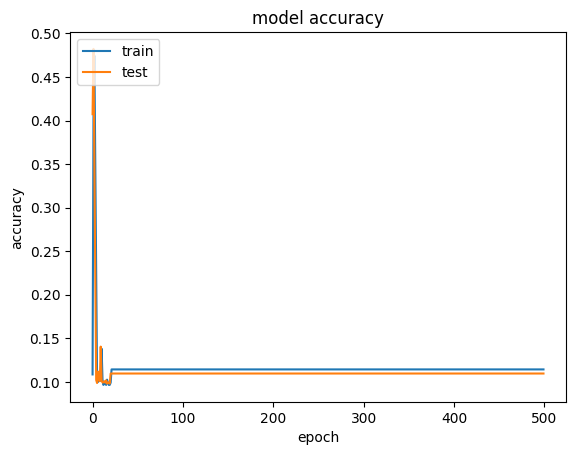

In [11]:
print(history.history.keys())
# history pour la métrique 'accuracy'
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluation des performances du modèle sur la base de test

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.1160 - loss: 2.3009
Test accuracy: 0.1135


Prenons les premières images dans l'ensemble de test

In [13]:
# Predictions sur l'ensemble de test
predictions = model.predict(x_test)

# Les predictions sont des probabilités pour chaque classe: il est d'usage que la prédiction soit le label le plus probable
predicted_classes = np.argmax(predictions, axis=1)

# Les vraies classes
true_classes = np.argmax(y_test, axis=1)

# Example of comparing predicted classes with true classes
print(f'Predicted classes: {predicted_classes[:20]}')
print(f'True classes: {true_classes[:20]}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
Predicted classes: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
True classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
